In [3]:
#0
import pandas as pd
import numpy as np

filename = '/Users/soojinlee/python/hw2/heart-statlog.csv'
data = pd.read_csv(filename)

a_list = data.values

a_list

array([[1, 70, 1, ..., 3, 3, 'present'],
       [2, 67, 0, ..., 0, 7, 'absent'],
       [3, 57, 1, ..., 0, 7, 'present'],
       ...,
       [268, 56, 0, ..., 0, 3, 'absent'],
       [269, 57, 1, ..., 0, 6, 'absent'],
       [270, 67, 1, ..., 3, 3, 'present']], dtype=object)

In [4]:
#1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

getLabel=[]

tmp_list = a_list
 
for j in range(len(tmp_list[0])):
    
    temp=[]
    
    for i in range(len(tmp_list)):
        temp.append(tmp_list[i][j])
        
    indexing = {}
    uniqueList = np.unique(temp)
    
    for i in range(len(uniqueList)):
        indexing[uniqueList[i]] = i
        
    getLabel.append(indexing)

for j in range(len(tmp_list[0])):
    
    temp=[]
    
    for i in range(len(tmp_list)):
        temp.append(tmp_list[i][j])
        
    le.fit(temp)
    list(le.classes_)
    tempTrans = le.transform(temp)
    
    for i in range(len(tmp_list)):
        tmp_list[i][j] = tempTrans[i]
        
a_list_enc = tmp_list




df= pd.DataFrame(data=a_list_enc)
df.to_csv('a_list_enc.csv',index=False,header=False)


print(a_list_enc)



[[0 36 1 ... 3 0 1]
 [1 33 0 ... 0 2 0]
 [2 23 1 ... 0 2 1]
 ...
 [267 22 0 ... 0 0 0]
 [268 23 1 ... 0 1 0]
 [269 33 1 ... 3 0 1]]


In [5]:
#2-1 

from sklearn.preprocessing import MinMaxScaler

list_temp = a_list_enc


min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(list_temp)

minmaxscaled_a_list = min_max_scaler.transform(a_list)

print(minmaxscaled_a_list)


[[0.         0.9        1.         ... 1.         0.         1.        ]
 [0.00371747 0.825      0.         ... 0.         1.         0.        ]
 [0.00743494 0.575      1.         ... 0.         1.         1.        ]
 ...
 [0.99256506 0.55       0.         ... 0.         0.         0.        ]
 [0.99628253 0.575      1.         ... 0.         0.5        0.        ]
 [1.         0.825      1.         ... 1.         0.         1.        ]]


In [6]:
#2-2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(a_list_enc)

a_list_enc_norm = scaler.transform(a_list_enc)
print(a_list_enc_norm)

import pandas as pd
df= pd.DataFrame(data=a_list_enc_norm)
df.to_csv('a_list_enc_norm.csv', index=False,header=False)

[[-1.72564764  1.74052305  0.6894997  ...  2.47268219 -0.85884094
   1.11803399]
 [-1.71281755  1.40493065 -1.45032695 ... -0.71153494  1.23023162
  -0.89442719]
 [-1.69998745  0.28628932  0.6894997  ... -0.71153494  1.23023162
   1.11803399]
 ...
 [ 1.69998745  0.17442519 -1.45032695 ... -0.71153494 -0.85884094
  -0.89442719]
 [ 1.71281755  0.28628932  0.6894997  ... -0.71153494  0.18569534
  -0.89442719]
 [ 1.72564764  1.40493065  0.6894997  ...  2.47268219 -0.85884094
   1.11803399]]


In [7]:
#3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_data=[]
for i in range(len(a_list_enc_norm)):
    X_data.append(a_list_enc_norm[i][:len(a_list_enc_norm[0])-1])
    
Y_data=[]   
for i in range(len(a_list_enc)):
    Y_data.append(a_list_enc[i][-1])

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)



[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [8]:
#4

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#a
accpp0=[]
clf = MLPClassifier(hidden_layer_sizes=(10), max_iter=100)
clf.fit(np.array(X_train), np.array(Y_train))
predictions = clf.predict(X_test)
accpp0.append(accuracy_score(Y_test, predictions))

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

clf = MLPClassifier(hidden_layer_sizes=(40), max_iter=100)
clf.fit(np.array(X_train), np.array(Y_train))
predictions = clf.predict(X_test)
accpp0.append(accuracy_score(Y_test, predictions))

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

clf = MLPClassifier(hidden_layer_sizes=(80), max_iter=100)
clf.fit(np.array(X_train), np.array(Y_train))
predictions = clf.predict(X_test)
accpp0.append(accuracy_score(Y_test, predictions))

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

#b

accpp=[]
clf = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100)
clf.fit(X_train, Y_train)
predictions =clf.predict(X_test)
accpp.append(accuracy_score(Y_test, predictions))

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))



clf = MLPClassifier(hidden_layer_sizes=(40,40), max_iter=100)
clf.fit(X_train, Y_train)
predictions =clf.predict(X_test)
accpp.append(accuracy_score(Y_test, predictions))

print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))




clf = MLPClassifier(hidden_layer_sizes=(80,80), max_iter=100)
clf.fit(X_train, Y_train)
predictions =clf.predict(X_test)
accpp.append(accuracy_score(Y_test, predictions))


print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))






/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached an

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.60      0.94      0.73        32

    accuracy                           0.73        81
   macro avg       0.77      0.76      0.73        81
weighted avg       0.80      0.73      0.73        81

[[29 20]
 [ 2 30]]
0.7283950617283951
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        49
           1       0.79      0.72      0.75        32

    accuracy                           0.81        81
   macro avg       0.81      0.80      0.80        81
weighted avg       0.81      0.81      0.81        81

[[43  6]
 [ 9 23]]
0.8148148148148148
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        49
           1       0.90      0.59      0.72        32

    accuracy                           0.81        81
   macro avg       0.84      0.78      0.79        8

/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


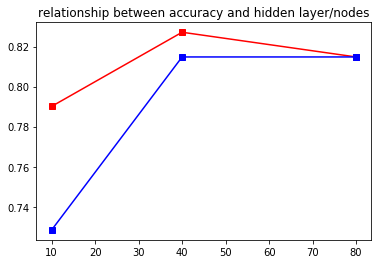

In [9]:
#4-2

import matplotlib.pyplot as plt
x_array = [10,40,80]
plt.plot(x_array, accpp, color ="red", marker='s')
plt.plot(x_array, accpp0, color ="blue", marker='s')
plt.title('relationship between accuracy and hidden layer/nodes')
plt.show()



In [10]:
#4-3

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='identity',max_iter=200)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))


print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[39 10]
 [12 20]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        49
           1       0.67      0.62      0.65        32

    accuracy                           0.73        81
   macro avg       0.72      0.71      0.71        81
weighted avg       0.73      0.73      0.73        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
#4-3

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='identity',max_iter=200)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))


print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[46  3]
 [15 17]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        49
           1       0.85      0.53      0.65        32

    accuracy                           0.78        81
   macro avg       0.80      0.74      0.75        81
weighted avg       0.79      0.78      0.76        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
#4-3

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='logistic',max_iter=200)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.3950617283950617]
[[ 0 49]
 [ 0 32]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.40      1.00      0.57        32

    accuracy                           0.40        81
   macro avg       0.20      0.50      0.28        81
weighted avg       0.16      0.40      0.22        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#4-3

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='tanh',max_iter=200)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.7407407407407407]
[[36 13]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        49
           1       0.65      0.75      0.70        32

    accuracy                           0.74        81
   macro avg       0.73      0.74      0.73        81
weighted avg       0.75      0.74      0.74        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
#4-3

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.6419753086419753]
[[28 21]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66        49
           1       0.53      0.75      0.62        32

    accuracy                           0.64        81
   macro avg       0.66      0.66      0.64        81
weighted avg       0.68      0.64      0.64        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
#4-4

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.2)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.3950617283950617]
[[ 0 49]
 [ 0 32]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.40      1.00      0.57        32

    accuracy                           0.40        81
   macro avg       0.20      0.50      0.28        81
weighted avg       0.16      0.40      0.22        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#4-4

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.4)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.7901234567901234]
[[46  3]
 [14 18]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.84        49
           1       0.86      0.56      0.68        32

    accuracy                           0.79        81
   macro avg       0.81      0.75      0.76        81
weighted avg       0.80      0.79      0.78        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
#4-4

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.6)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.3950617283950617]
[[ 0 49]
 [ 0 32]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.40      1.00      0.57        32

    accuracy                           0.40        81
   macro avg       0.20      0.50      0.28        81
weighted avg       0.16      0.40      0.22        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
#4-4

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.7654320987654321]
[[37 12]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        49
           1       0.68      0.78      0.72        32

    accuracy                           0.77        81
   macro avg       0.76      0.77      0.76        81
weighted avg       0.78      0.77      0.77        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
#4-4

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.8148148148148148]
[[40  9]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        49
           1       0.74      0.81      0.78        32

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
#4-5

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8,learning_rate='constant')
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[0.7777777777777778]
[[43  6]
 [12 20]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        49
           1       0.77      0.62      0.69        32

    accuracy                           0.78        81
   macro avg       0.78      0.75      0.76        81
weighted avg       0.78      0.78      0.77        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
#4-5

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8,learning_rate='invscaling')
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))


[0.6666666666666666]
[[24 25]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.92      0.49      0.64        49
           1       0.55      0.94      0.69        32

    accuracy                           0.67        81
   macro avg       0.73      0.71      0.66        81
weighted avg       0.77      0.67      0.66        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
#4-5

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8,learning_rate='adaptive')
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))


[0.7777777777777778]
[[40  9]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        49
           1       0.72      0.72      0.72        32

    accuracy                           0.78        81
   macro avg       0.77      0.77      0.77        81
weighted avg       0.78      0.78      0.78        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
#4-5

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8,learning_rate='adaptive',learning_rate_init=0.002)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))


[0.7654320987654321]
[[36 13]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        49
           1       0.67      0.81      0.73        32

    accuracy                           0.77        81
   macro avg       0.76      0.77      0.76        81
weighted avg       0.78      0.77      0.77        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
#4-5

arr1 = []
clf = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu',max_iter=200, momentum=0.8,learning_rate='adaptive',learning_rate_init=0.003)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
arr1.append(accuracy_score(Y_test,pred))
print(arr1)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))


[0.3950617283950617]
[[ 0 49]
 [ 0 32]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.40      1.00      0.57        32

    accuracy                           0.40        81
   macro avg       0.20      0.50      0.28        81
weighted avg       0.16      0.40      0.22        81



/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/soojinlee/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#5
from sklearn.preprocessing import KBinsDiscretizer
list_temp=a_list_enc

disc = KBinsDiscretizer(n_bins=4,encode='ordinal', strategy='uniform')
disc.fit_transform(list_temp)

a_list_enc_disc = list_temp

print(a_list_enc_disc)

df=pd.DataFrame(data=a_list_enc_disc)
df.to_csv('a_list_enc_disc.csv',index=False,header=False)

[[0 36 1 ... 3 0 1]
 [1 33 0 ... 0 2 0]
 [2 23 1 ... 0 2 1]
 ...
 [267 22 0 ... 0 0 0]
 [268 23 1 ... 0 1 0]
 [269 33 1 ... 3 0 1]]


In [26]:
#6
from sklearn import tree

X_data2=[]
for i in range(len(a_list_enc_disc)):
    X_data2.append(a_list_enc_disc[i][:len(a_list_enc_disc[0])-1])
Y_data2=[]
for i in range(len(a_list_enc)):
    Y_data2.append(a_list_enc[i][-1])

X_train, X_test, Y_train, Y_test = train_test_split(X_data2, Y_data2, test_size=0.3, random_state=42)


scaler.fit(a_list_enc)

a_list_enc_norm = scaler.transform(a_list_enc)
print(a_list_enc_norm)


scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#entropy
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(scaled_X_train,Y_train)
Y_pr = clf.predict(scaled_X_test)
print(accuracy_score(Y_test, Y_pr))


#gini
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(scaled_X_train,Y_train)
Y_pr = clf.predict(scaled_X_test)
print(accuracy_score(Y_test, Y_pr))


[[-1.72564764  1.74052305  0.6894997  ...  2.47268219 -0.85884094
   1.11803399]
 [-1.71281755  1.40493065 -1.45032695 ... -0.71153494  1.23023162
  -0.89442719]
 [-1.69998745  0.28628932  0.6894997  ... -0.71153494  1.23023162
   1.11803399]
 ...
 [ 1.69998745  0.17442519 -1.45032695 ... -0.71153494 -0.85884094
  -0.89442719]
 [ 1.71281755  0.28628932  0.6894997  ... -0.71153494  0.18569534
  -0.89442719]
 [ 1.72564764  1.40493065  0.6894997  ...  2.47268219 -0.85884094
   1.11803399]]
0.7160493827160493
0.7283950617283951


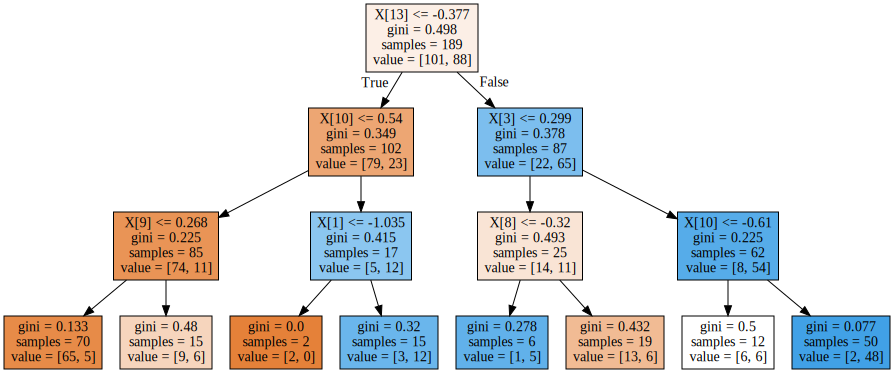

In [27]:
#6-2
import graphviz

togradata = tree.export_graphviz(clf,out_file=None, filled=True)
graph =graphviz.Source(togradata)

graph

In [28]:
#6-3

from sklearn import tree

X_data2=[]
for i in range(len(a_list_enc_disc)):
    X_data2.append(a_list_enc_disc[i][:len(a_list_enc_disc[0])-1])
Y_data2=[]
for i in range(len(a_list_enc)):
    Y_data2.append(a_list_enc[i][-1])

X_train, X_test, Y_train, Y_test = train_test_split(X_data2, Y_data2, test_size=0.3, random_state=42)


scaler.fit(a_list_enc)

a_list_enc_norm = scaler.transform(a_list_enc)
print(a_list_enc_norm)


scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#entropy
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(scaled_X_train,Y_train)
Y_pr = clf.predict(scaled_X_test)
print(accuracy_score(Y_test, Y_pr))


#gini
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(scaled_X_train,Y_train)
Y_pr = clf.predict(scaled_X_test)
print(accuracy_score(Y_test, Y_pr))


[[-1.72564764  1.74052305  0.6894997  ...  2.47268219 -0.85884094
   1.11803399]
 [-1.71281755  1.40493065 -1.45032695 ... -0.71153494  1.23023162
  -0.89442719]
 [-1.69998745  0.28628932  0.6894997  ... -0.71153494  1.23023162
   1.11803399]
 ...
 [ 1.69998745  0.17442519 -1.45032695 ... -0.71153494 -0.85884094
  -0.89442719]
 [ 1.71281755  0.28628932  0.6894997  ... -0.71153494  0.18569534
  -0.89442719]
 [ 1.72564764  1.40493065  0.6894997  ...  2.47268219 -0.85884094
   1.11803399]]
0.7283950617283951
0.7530864197530864


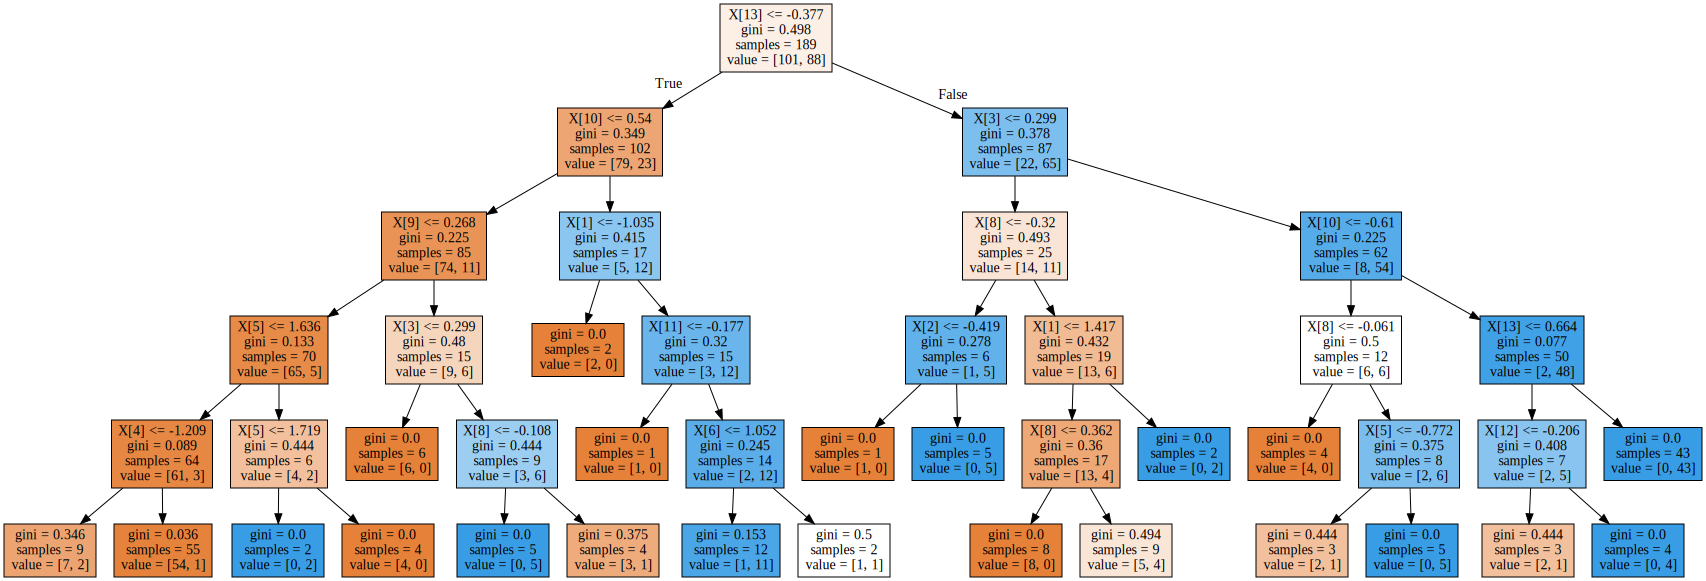

In [29]:
#6-3-2


togradata = tree.export_graphviz(clf,out_file=None, filled=True)
graph =graphviz.Source(togradata)

graph